# Hyper-parameters Study

We wish here to study the influence of some parameters of our model on the relative error.

In [1]:
import sqlite3
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
def load_data(database_file):
    conn = sqlite3.connect(database_file)
    df = pd.read_sql_query("SELECT * FROM results", conn)
    conn.close()
    return df

database_file = '../results.db'
df = load_data(database_file)

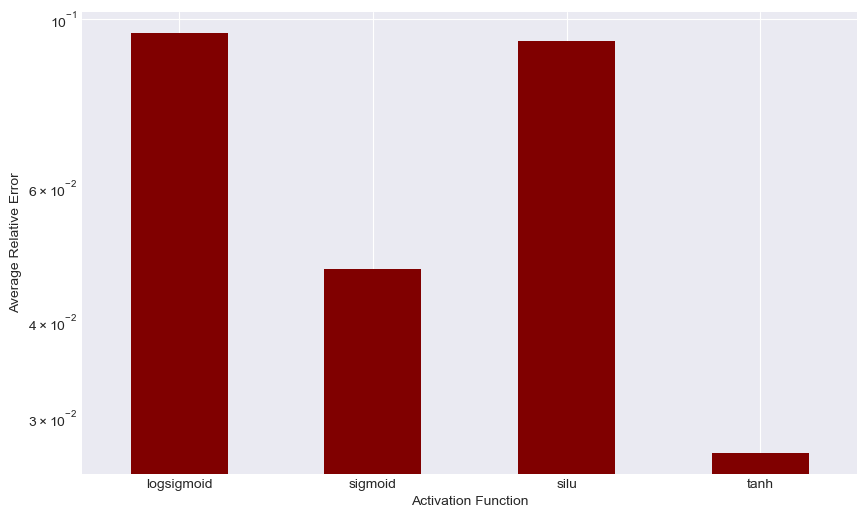

In [3]:
df['activation'] = df['model_name'].str.extract(r'(tanh|sigmoid|silu|logsigmoid)')

# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('activation')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
ax = grouped_data.plot.bar(x='activation', y='accuracy', color='maroon', legend=False, figsize=(10, 6))
# ax = df.boxplot(column='accuracy', by='activation')
#ax.set_ylim(0.0, 1.0)
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Activation Function')
ax.set_ylabel('Average Relative Error')
plt.xticks(rotation=0)
plt.show()

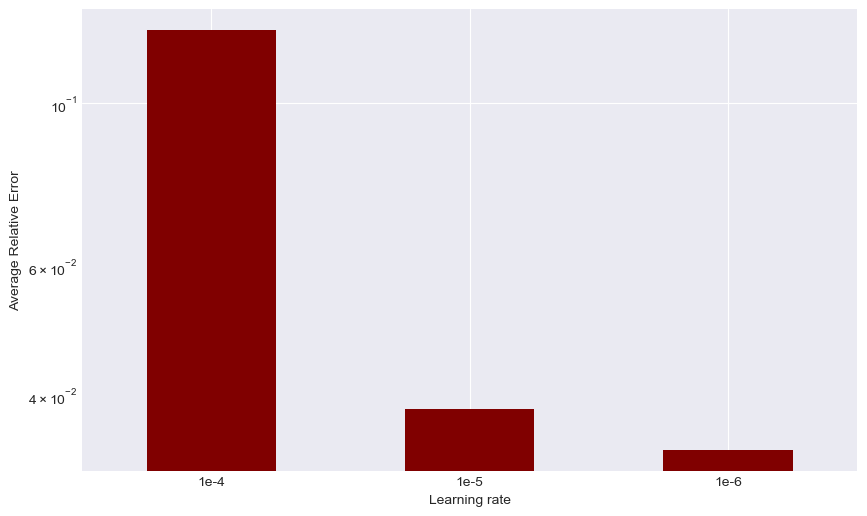

In [4]:
df['lr'] = df['model_name'].str.extract(r'(1e-3|1e-4|1e-5|1e-6)')

# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('lr')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
ax = grouped_data.plot.bar(x='lr', y='accuracy', color='maroon', legend=False, figsize=(10, 6))
# ax = df.boxplot(column='accuracy', by='lr')
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Learning rate')
ax.set_ylabel('Average Relative Error')
plt.xticks(rotation=0)
plt.show()

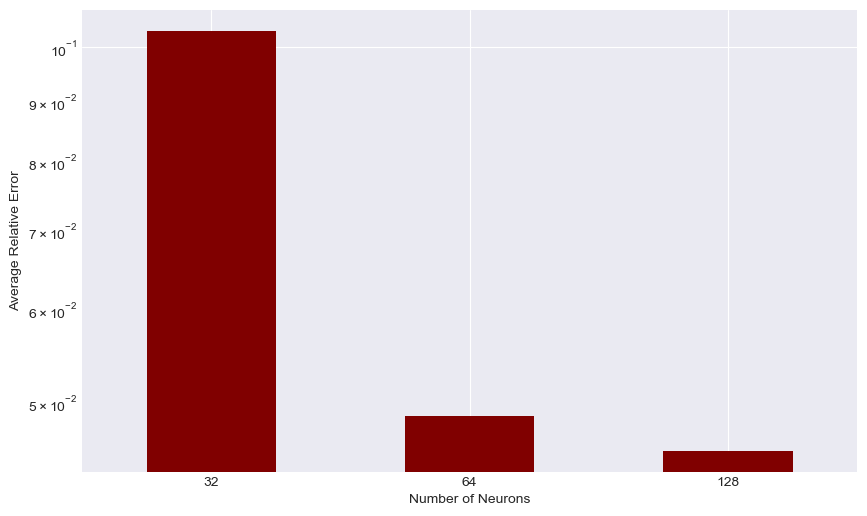

In [5]:
df['num_neurons'] = df['model_name'].str.extract(r'(32|64|128)')
df['num_neurons'] = df['num_neurons'].astype(int)
# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('num_neurons')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
ax = grouped_data.plot.bar(x='num_neurons', y='accuracy', color='maroon', legend=False, figsize=(10, 6))
#ax = df.boxplot(column='accuracy', by='num_neurons')
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Relative Error')
plt.xticks(rotation=0)
plt.show()

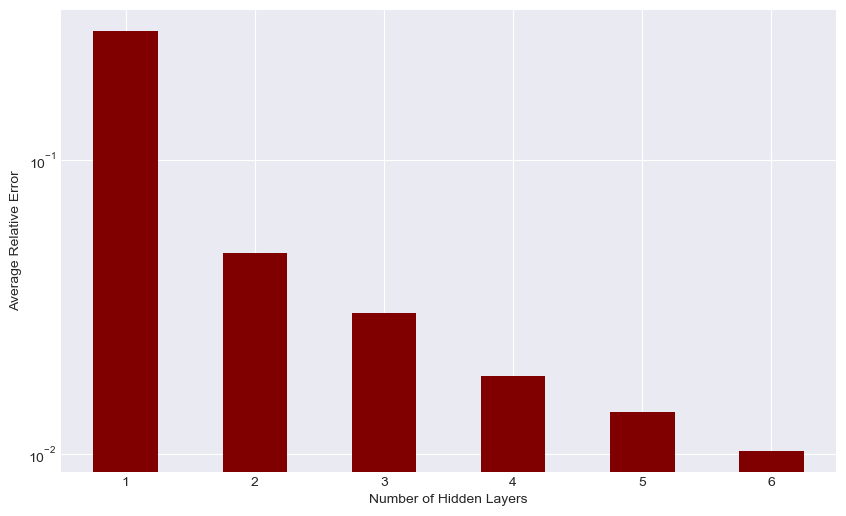

In [6]:
df['num_layers'] = df['model_name'].str.extract(r'([1-7])').astype(int)

# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('num_layers')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
ax = grouped_data.plot.bar(x='num_layers', y='accuracy', color='maroon', legend=False, figsize=(10, 6))
#ax = df.boxplot(column='accuracy', by='num_layers')
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Number of Hidden Layers')
ax.set_ylabel('Average Relative Error')
plt.xticks(rotation=0)
plt.show()

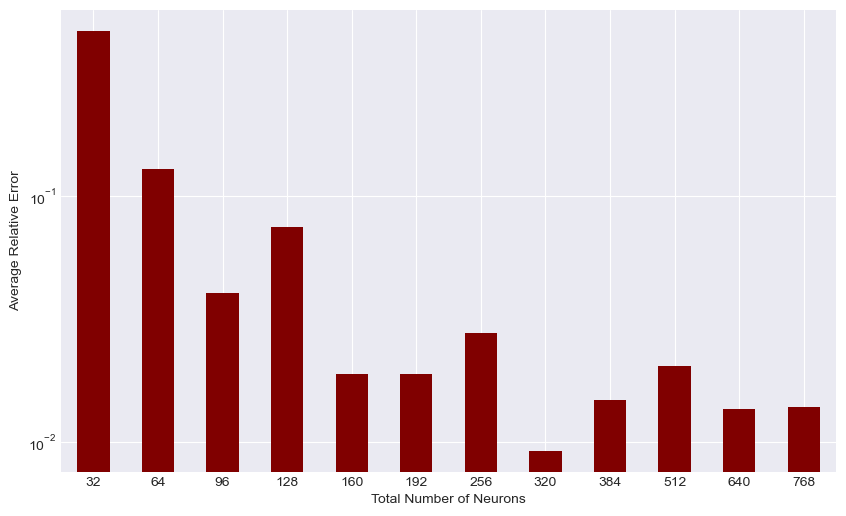

In [7]:
# Extraire le nombre de neurones par couche et le nombre de couches à partir du nom du modèle
df['num_neurons'] = df['model_name'].str.extract(r'(32|64|128)').astype(int)
df['num_layers'] = df['model_name'].str.extract(r'([1-7])').astype(int)

# Calculer le nombre total de neurones
df['total_neurons'] = df['num_neurons'] * df['num_layers']

# Grouper les données par le nombre total de neurones et calculer la précision moyenne
grouped_data = df.groupby('total_neurons')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec le nombre total de neurones et les précisions
ax = grouped_data.plot.bar(x='total_neurons', y='accuracy', color='maroon', legend=False, figsize=(10, 6))
ax.set_yscale('log')

# Configurer le graphique
ax.set_xlabel('Total Number of Neurons')
ax.set_ylabel('Average Relative Error')
plt.xticks(rotation=0)
plt.show()